

---

<center><h1>Assignment 4</h1></center>

---

# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [1]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import hinge_loss
import pprint

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)  # Deliberately use a different seed
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [2]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

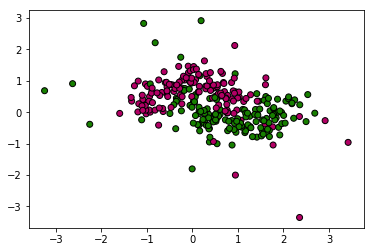

In [3]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

The best value of C is  1.0
The accuracy of the model for the best value of C is:  0.8333333333333334


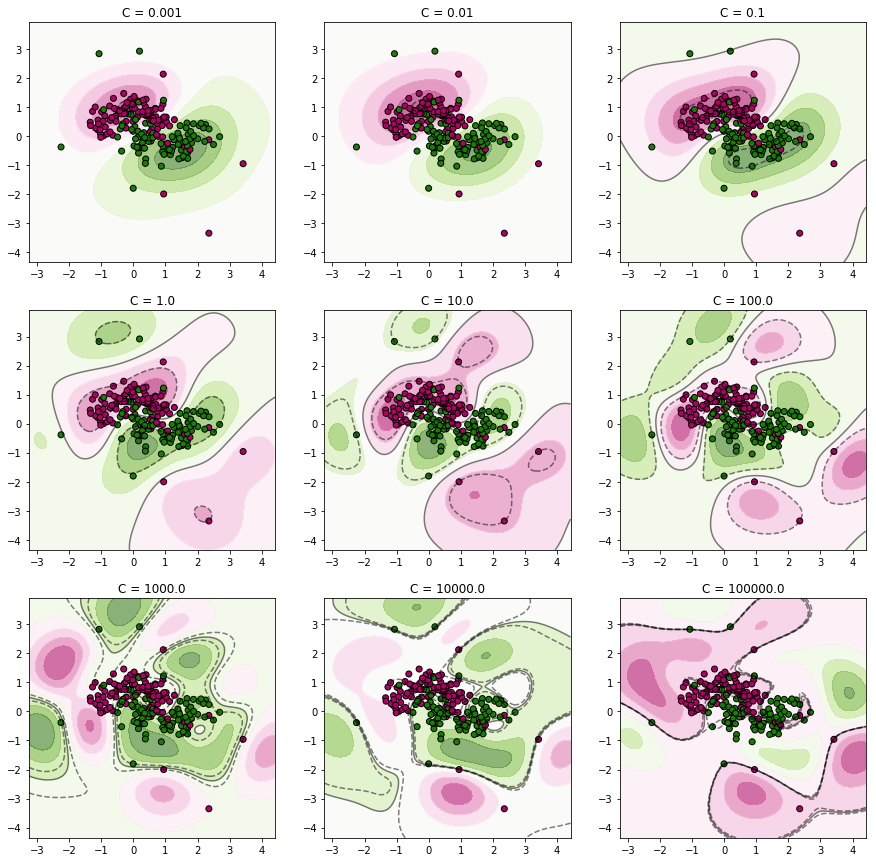

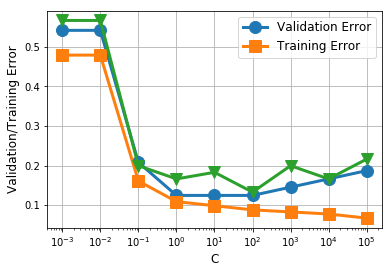

In [7]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()
tstErr = dict()
for C in C_values:
    models[C] = SVC(C=C, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr',
                    degree=3, gamma='scale', kernel='rbf',
                    max_iter=-1, probability=False,random_state=None, 
                    shrinking=True,tol=0.001, verbose=False)
    fit = models[C].fit(X_trn, y_trn)

    
    trnErr[C] = 1 - fit.score(X_trn, y_trn)
    valErr[C] = 1 - fit.score(X_val, y_val)
    tstErr[C] = 1 - fit.score(X_tst, y_tst)
    
visualize(models, 'C', X_trn, y_trn)

#fetching the best value of C

C_BstVal = min(valErr, key=valErr.get)
print('The best value of C is ',C_BstVal)
yPred = models[C_BstVal].predict(X_tst)
accuracy = accuracy_score(y_tst, yPred)

print("The accuracy of the model for the best value of C is: ",accuracy)

plt.figure()
plt.grid()
plt.xscale('log')
plt.plot(valErr.keys(), valErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(trnErr.keys(), trnErr.values(), marker='s', linewidth=3, markersize=12)
plt.plot(tstErr.keys(), tstErr.values(), marker='v', linewidth=3, markersize=12)
plt.xlabel('C', fontsize=12)
plt.ylabel('Validation/Training Error', fontsize=12)
plt.xticks(list(valErr.keys()), fontsize=10)
plt.legend(['Validation Error', 'Training Error'], fontsize=12)



When the value of C is small, then the influence on the loss would also be a smaller value, the margin is larger and also the model is simpler, at the same time bias is high.
The model underfits the data points. At the cost of training accuracy, we have simpler desicion function.

As C keeps on increasing, in the process of fitting almost every dat point, the model eve fits noise. A smaller margin is acceptable, if the decision function is classifies all training points better and accurately at higher value of C and therefore, this gets more complex.
Hence, the bias is small and variance is high. Therefore, it overfits.

Therefore, C behaves like a regularization parameter in the SVM.

By visualizing the model, 

- for lower values of C, like 0.001, 0.01 and 0.1, the model is looks very simple whereas the bias is high, it underfits.

- for higher values of C, like 1000, 10000 and 100000, the model becomes really complex, variance is high, it overfits.

When the value of C =1, we see a trade-off between bias and variance. Therfore, the best value of C is 1 where the validation error is minimum.


The objective function of SVM is given by 1/2(𝐰′𝐰)+𝐶 Σℓ(𝐰∣𝐱𝑖,𝑦𝑖); i ranges from 1 to n;
𝐱𝑖 -> training examples;
𝑦𝑖 -> the training labels.

𝐰′𝐰 is the regularization term. 

Regularization is a technique to avoid overfitting. 𝐶 Σℓ(𝐰∣𝐱𝑖,𝑦𝑖) is the hinge loss term.

- In soft margin SVM, it penalizes misclassifications.

- In hard margin SVM there are no misclassifications (by definition).




---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

The best value of G would be  1.0
The accuracy of the model for the best value of G is:  0.8333333333333334


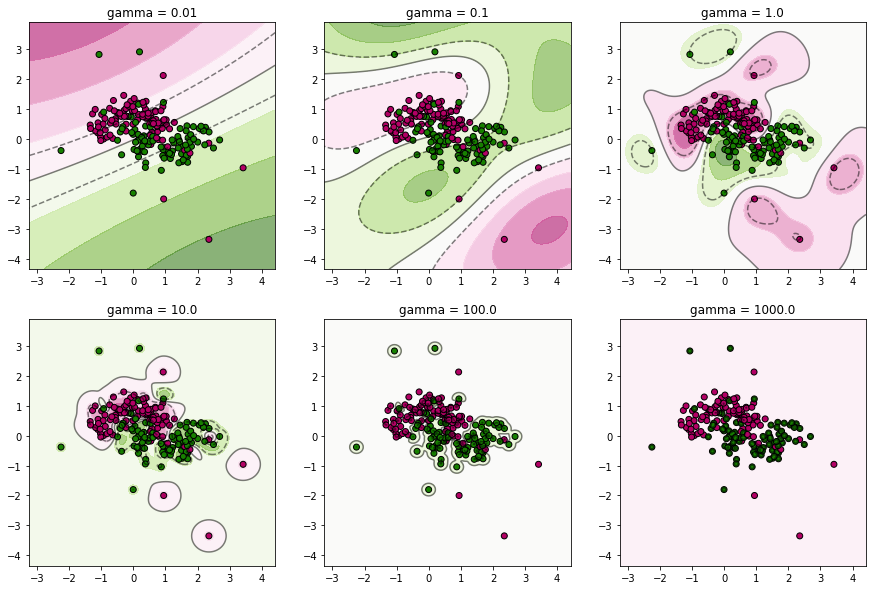

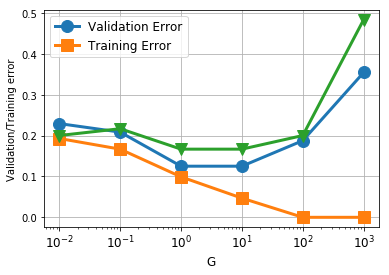

In [9]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()
tstErr = dict()


for G in gamma_values:
    
     models[G]=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', 
                   degree=3, gamma=G, kernel='rbf',
                   max_iter=-1, probability=False, 
                   random_state=None, shrinking=True,
                  tol=0.001, verbose=False)
     fit = models[G].fit(X_trn, y_trn)

     trnErr[G] = 1 - fit.score(X_trn, y_trn)
     valErr[G] = 1 - fit.score(X_val, y_val)
     tstErr[G] = 1 - fit.score(X_tst, y_tst)
        
    
 
  
visualize(models, 'gamma', X_trn, y_trn)

bestValue = min(valErr, key=valErr.get)
print("The best value of G would be ",bestValue)
yPred = models[bestValue].predict(X_tst)
accuracy = accuracy_score(y_tst, yPred)
print("The accuracy of the model for the best value of G is: ",accuracy)


plt.figure()
plt.grid()
plt.xscale('log')
plt.plot(valErr.keys(), valErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(trnErr.keys(), trnErr.values(), marker='s', linewidth=3, markersize=12)
plt.plot(tstErr.keys(), tstErr.values(), marker='v', linewidth=3, markersize=12)
plt.xlabel('G', fontsize=12)
plt.ylabel('Validation/Training error', fontsize=10)
plt.xticks(list(valErr.keys()), fontsize=12)
plt.legend(['Validation Error', 'Training Error'], fontsize=12)

When 𝛾 value is small, the influence of the loss is also small, the model is simple and hence it has got high bias. 
The model underfits the data points.

When 𝛾 value increases, the model tries to fit almost every data point. Therefore, it becomes highly complex, the bias is less and the variance is high. It is highly sensitive to noise and it starts to overfit.

From the visualization of the model, 

- At lower values of 𝛾, like 0.001,0.01, the model is very simple, the bias is high and it underfits.

- At higher values of 𝛾 like 1000, 10000, 100000, the model becomes highly complex, it tries to fit all the data points and it also fits noise and variance is high.

RBF kernel: 𝜅(𝐱,𝐳)=exp(−𝛾⋅‖𝐱−𝐳‖2) ‖𝐱−𝐳‖2 is the squared Euclidean distance between the two feature vectors.
𝛾 is the regularization factor.

When 𝛾 value is 1, there's a trade-off between bias and variance. Therefore, the best value of 𝛾 is would be 1.


---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [ ]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
# Insert your code here.
#

BCD_trn = np.loadtxt('wdbc_trn.csv', delimiter = ',')
BCD_tst = np.loadtxt('wdbc_tst.csv', delimiter = ',')
BCD_val = np.loadtxt('wdbc_val.csv', delimiter = ',')

X_trn = np.array(BCD_trn[:,1:])
y_trn = np.array(BCD_trn[:,0])
X_tst = np.array(BCD_tst[:,1:])
y_tst = np.array(BCD_tst[:,0])
X_val = np.array(BCD_val[:,1:])
y_val = np.array(BCD_val[:,0])

Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [ ]:
#
#
# Insert your code here to perform model selection
#
#

C_range = np.arange(-2.0, 5.0, 1.0)
C_vals = np.power(10.0, C_range)
gamma_range = np.arange(-3.0, 3.0, 1.0)
gamma_vals = np.power(10.0, gamma_range)

models = dict()
trn_err = dict()
val_err = dict()
tstErr = dict()

accuracy = 0
C_BstVal = 0
bestGammaValue = 0


for C in C_vals:
    for G in gamma_vals:
        models[(C,G)]=SVC(C=C, cacheSize=200, classWeight=None, coef0=0.0,decision_function_shape='ovr', degree=3, 
                          gamma=G, kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,
                          tol=0.001, verbose=False)
        
        fit = models[(C,G)].fit(X_trn, y_trn)
              
        trn_err[(C,G)] = 1 - fit.score(X_trn, y_trn)
        val_err[(C,G)] = 1 - fit.score(X_val, y_val)


bestVal = min(val_err, key=val_err.get)
print("The best values of C and Gamma are given by",bestVal,"respectively")
yPred = models[bestVal].predict(X_tst)
accuracy = accuracy_score(y_tst, yPred)
print("The accuracy of the model for the best values of C and G is given by: ",accuracy)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(trn_err)
pp.pprint(val_err) 

---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points. 

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

In [5]:
#
#
# Insert your code here to perform model selection
#
#

**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.

We can observe that whenever training data size increases, SVM performs better than kNN and it also has got more accuracy comparitively.

kNN seems to be a good classifier at the same time its performance depends on the value of k.
It does not give good results when the value of k is small and we would get better results as the k value grows higher.

PCA is more sensitive to SVM than kNN, whenever the Principle Component (PC) value increases, SVM gives better results and accuracy score seems more than kNN.

